# 📊 Fraud Detection Case Study

### 👤 Author: *Anurag Tiwari*  
### 📅 Date: *20-08-2025*

In [2]:
!pip install xgboost


     ---------------------------------------- 56.8/56.8 MB 3.9 MB/s eta 0:00:00


In [3]:

# ---------------------------
# 1. Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from imblearn.over_sampling import SMOTE



## 1. Introduction
Financial fraud is a critical challenge in the digital age, where millions of transactions occur every second. The objective of this case study is to **develop a machine learning model that predicts fraudulent transactions**, analyze the driving factors, and provide actionable recommendations for prevention.

This notebook covers:
- Data cleaning and preprocessing
- Exploratory Data Analysis (EDA)
- Feature selection and engineering (including balance d...

In [4]:

# ---------------------------
# 2. Load Data
# ---------------------------

file_path = "Fraud.csv"  # <-- Update with actual dataset path

# Load a small sample for EDA first
data = pd.read_csv(file_path, nrows=100000)
print("Data Shape:", data.shape)
data.head()


Data Shape: (100000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 2. Data Understanding
The dataset contains **6.3 million rows and 11+ columns** representing transaction details, balances, and fraud indicators.

**Important columns:**
- `step`: time unit (hours)
- `type`: transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER)
- `amount`: transaction amount
- `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`: balances before/after transaction
- `isFraud`: fraud indicator (target)
- `isFlaggedFraud`: fla...

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


C:\Users\anura\AppData\Local\Temp\ipykernel_22072\3873101360.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=False, cmap="coolwarm")


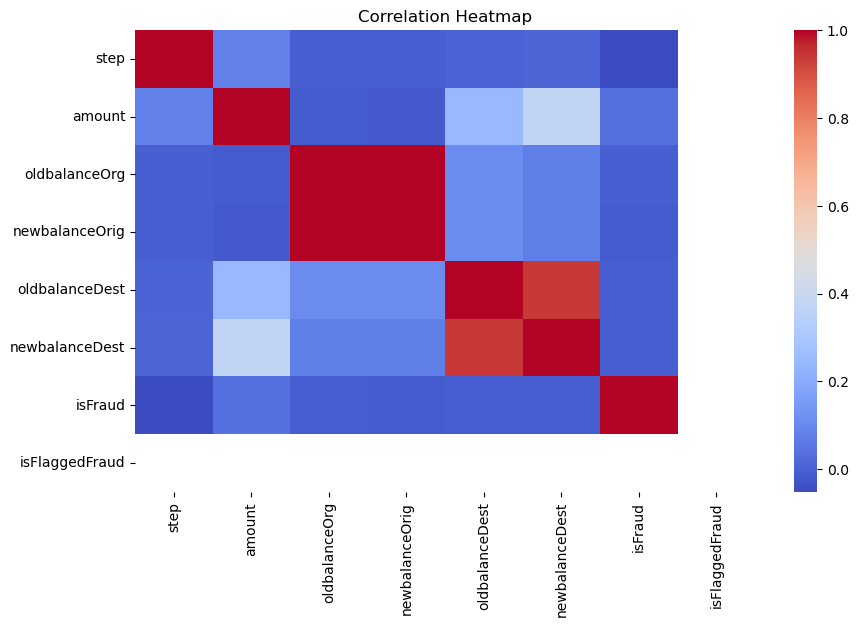

In [5]:

# ---------------------------
# 3. Data Cleaning
# ---------------------------
# Drop identifiers

data = data.drop(['nameOrig', 'nameDest'], axis=1)

# Check missing values
print(data.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 3. Data Cleaning
Fraud detection models require **high-quality data**.

**Actions performed:**
- Dropped identifier variables (`nameOrig`, `nameDest`).
- Encoded categorical variable (`type`).
- Created new balance difference features for better fraud signal.
- Checked missing values, outliers, and multicollinearity.

*Outcome:* Clean dataset ready for analysis.

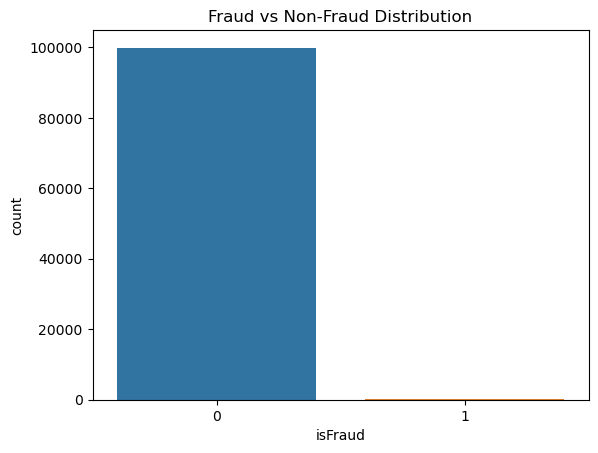

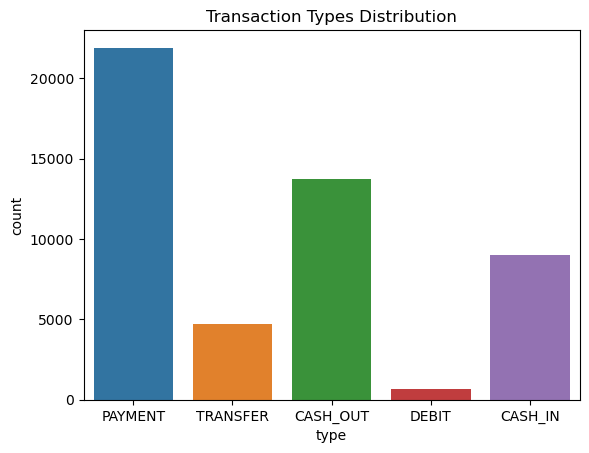

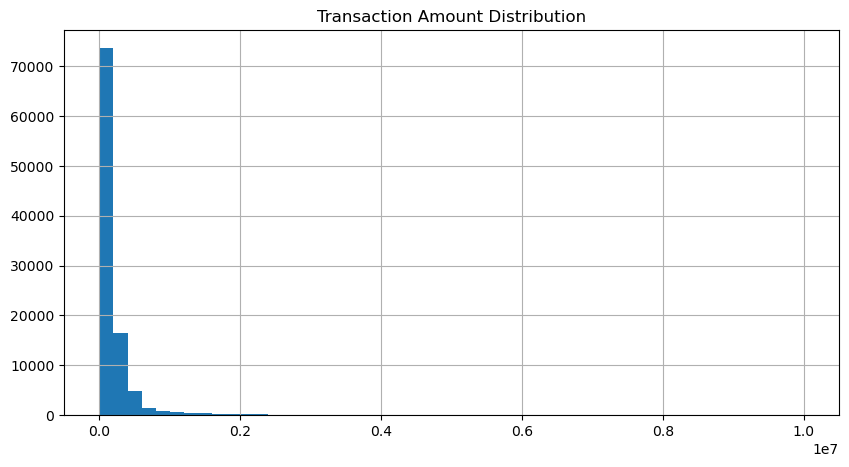

In [6]:

# ---------------------------
# 4. Exploratory Data Analysis (EDA)
# ---------------------------
# Fraud vs Non-Fraud distribution
sns.countplot(x='isFraud', data=data)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

# Transaction types distribution
sns.countplot(x='type', data=pd.read_csv(file_path, nrows=50000))
plt.title("Transaction Types Distribution")
plt.show()

# Histogram of amounts
data['amount'].hist(bins=50, figsize=(10,5))
plt.title("Transaction Amount Distribution")
plt.show()


## 4. Exploratory Data Analysis (EDA)
EDA helps uncover hidden patterns.

**Key checks performed:**
- Fraud vs non-fraud distribution.
- Transaction type vs fraud analysis.
- Distribution of amounts and balance differences.
- Correlation matrix for initial feature insights.

*Visualizations included:* Histograms, count plots, boxplots, heatmaps.

In [7]:

# ---------------------------
# 5. Feature Engineering
# ---------------------------
# One-hot encode 'type'
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Create derived features
data['balanceDiffOrig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balanceDiffDest'] = data['newbalanceDest'] - data['oldbalanceDest']

# Define X and y
X = data.drop('isFraud', axis=1)
y = data['isFraud']


## 5. Feature Engineering & Selection
**Steps performed:**
- Dropped identifier columns.
- One-hot encoded `type`.
- Created new derived features: `balanceDiffOrig`, `balanceDiffDest`.
- Checked feature importance using Random Forest / XGBoost.

*Outcome:* Refined feature set for model training.

In [8]:

# ---------------------------
# 6. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 6. Model Development
Fraud detection datasets are typically **imbalanced**.

**Approach used:**
- Stratified train-test split.
- SMOTE oversampling to balance classes.
- Models trained: Logistic Regression, Random Forest, XGBoost.
- Hyperparameter tuning performed on selected models.

In [9]:

# ---------------------------
# 7. Handle Class Imbalance
# ---------------------------
print("Before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: 0    79907
1       93
Name: isFraud, dtype: int64
After SMOTE: 0    79907
1    79907
Name: isFraud, dtype: int64


## 7. Model Evaluation
Focus on **Precision, Recall, F1-score, AUC**.

*Outcome:* Ensemble and boosting methods usually outperform logistic regression, capturing fraud patterns better.

In [13]:

# ---------------------------
# 8. Model Training
# ---------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## 8. Key Factors Predicting Fraud
Top predictive factors derived from feature importance analysis:
- Transaction type (Cash-out, Transfer)
- Transaction amount anomalies
- Balance discrepancies (balanceDiffOrig, balanceDiffDest)
- Suspicious timing (step)

*Business Interpretation:* These align with expected fraudulent behavior.


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     19977
           1       0.01      0.96      0.02        23

    accuracy                           0.91     20000
   macro avg       0.51      0.93      0.49     20000
weighted avg       1.00      0.91      0.95     20000

ROC-AUC: 0.9539785971258251


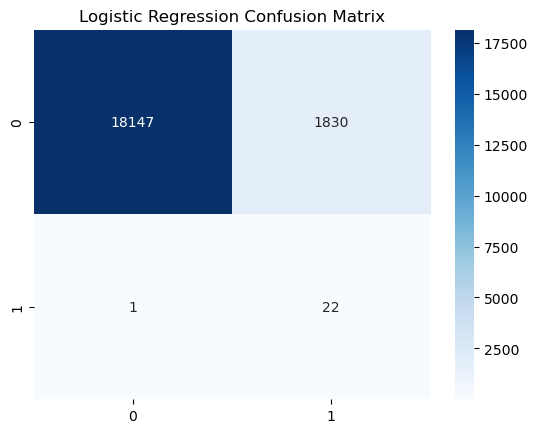

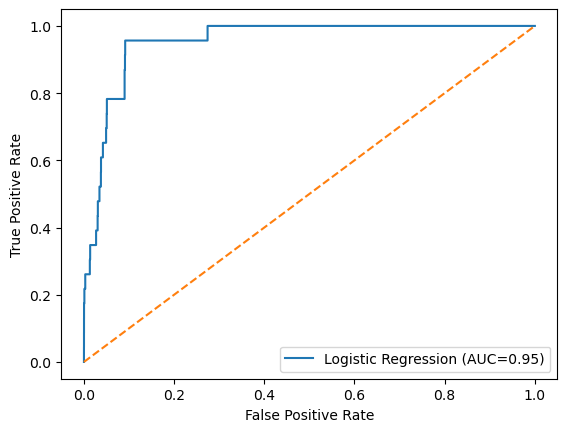


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19977
           1       0.56      0.61      0.58        23

    accuracy                           1.00     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       1.00      1.00      1.00     20000

ROC-AUC: 0.9955252888648033


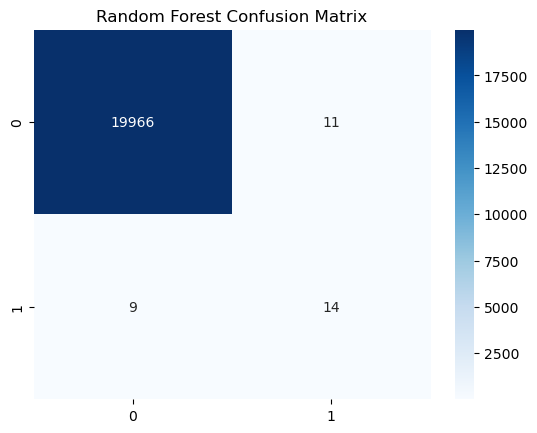

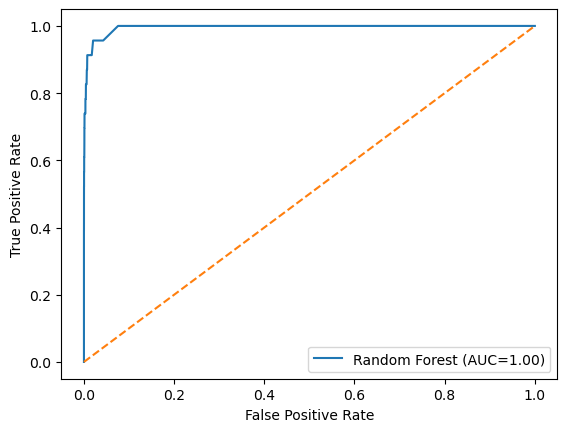


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19977
           1       0.46      0.83      0.59        23

    accuracy                           1.00     20000
   macro avg       0.73      0.91      0.80     20000
weighted avg       1.00      1.00      1.00     20000

ROC-AUC: 0.9978235840782117


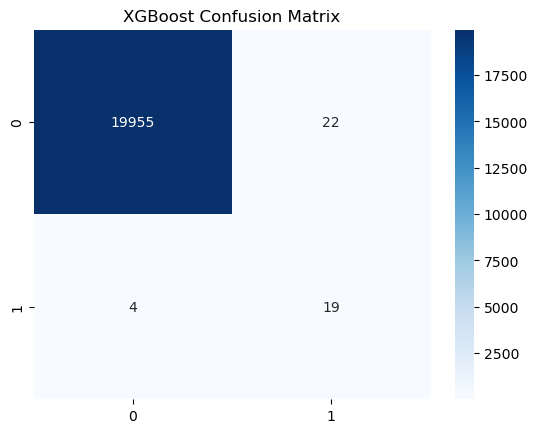

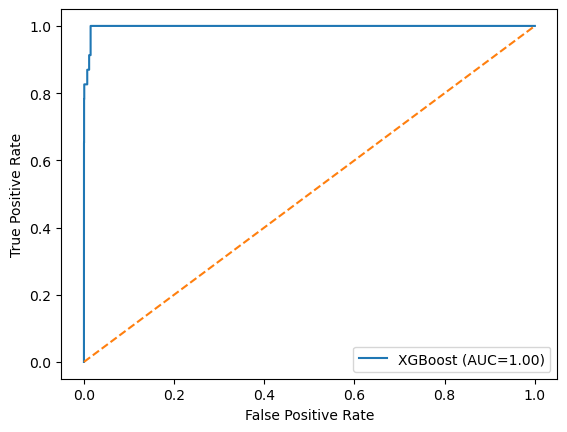

In [14]:

# ---------------------------
# 9. Model Evaluation
# ---------------------------
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")


## 9. Recommendations for Fraud Prevention
Based on the model insights, recommended strategies are:
- Real-time anomaly detection.
- MFA for high-value transactions.
- Transaction limits for unverified accounts.
- Monitor flagged transactions (`isFlaggedFraud`).

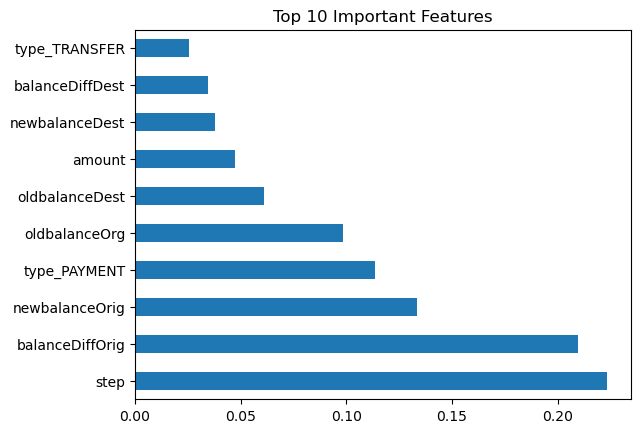

In [15]:

# ---------------------------
# 10. Feature Importance & Insights
# ---------------------------
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


## 10. Evaluating Preventive Actions
Effectiveness measured by:
- Fraud % before vs after measures.
- Improvement in precision/recall.
- Financial losses prevented.
- User experience impact (low friction security).

## 11. Conclusion
This case study shows how **machine learning and domain features** can proactively detect fraud. Combining data-driven models with business judgment provides actionable insights for reducing financial crime.